<div class="alert alert-info" role="alert">
 <p class ="lead"> 
 <h1>Física estadística </h1>
 <h2>Tarea 1</h2>
 </div>

Aquino Chapa Martha Abril

In [1]:
using Plots
using LaTeXStrings
using DelimitedFiles
using ExcelFiles
using XLSX
using DataFrames
using StatsBase

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling ExcelFiles [89b67f3b-d1aa-5f6f-9ca4-282e8d98620d]
└ @ Base loading.jl:1278
┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278


### Ejercicio 1:

In [ ]:
data2=DataFrame(XLSX.readtable("Tarea1.xlsx", "Hoja1")...)

b) 1000 volados utilizando un generador aleatorio (a computadora).

In [ ]:
#Un arreglo que indique que número de tirada es
n1_b=zeros(1000)
#Un arreglo donde se anexará si salió sol (1) o águila (0)
f1_b=zeros(1000)
for i in 1:1000
    n1_b[i]=i
    #Pedimos al programa que nos de aleatoriamente un valor entre 0 y 1
    f1_b[i]=rand((1,0))
end

#### Ejercicio 4: Más de caminantes aleatorios... más alcohol
Para el sistema planteado en el inciso 3a), elabora 1000 listas (1000 caminantes) de 30 pasos cada
una. Utiliza para ello un código en tu lenguaje favorito (incluye a tu tarea como apéndice el código,
todo en un mismo pdf). Cada una de estas listas está conformada por instancias o realizaciones de
las siguientes variables aleatorias $X_i$:

$\{X_1, X_2,X_3, ...,X_{29}, X_{30}\}$
Nota: Para generar estas listas en Python, puedes utilizar la función “random.choices”. Por ejemplo,
la siguiente función regresa un arreglo con 30 realizaciones de números al azar de entre {−1, 0, 1},
donde las probabilidades son 1/3 para cada una de ellas:
random.chices ([ −1 , 0 , 1] , w eig h t s = (1/3 ,1/3 ,1/3 ) , k=30).

Cada uno de estos elementos es la magnitud de un paso, es decir, cada uno de los elementos $X_i$ de
la ec (2). Para obtener la trayectoria de la caminata lo  ́unico que tienes que hacer es ir sumando
sucesivamente cada uno de estos elementos (la posición final de la caminata es, entonces, la suma
total de todos esos resultados).

Nota que cada una de estas 1000 caminatas podemos entenderla como una realización de la variable
aleatoria $Y_i$ como la definimos en la ec. (1). De esta manera, esperamos que si tomáramos un número
infinito de realizaciones (es decir, caminatas), recobraríamos la estadística que obtuviste en el inciso
3a). Pero, ¿qué pasaría si el número de realizaciones es finito? Veamos:

a) Gráfica 20 de las (1000) listas junto con la desviaci ́on est ́andar de la expresión analítica que
encontraste para este sistema en el inciso 3a). Debes encontrar algo parecido a esto:

In [ ]:
zeros(3,2)

In [2]:
valores = [1,-1,0]
probabilidad = [1/3,1/3,1/3]
listas=zeros(30,1000)
for i in 1:1000
    for j in 1:30
       listas[j,i]=sample(valores, Weights(probabilidad))
    end
end

Ahora para obtener la posición del caminante en el n's paso

In [29]:
posicion=zeros(29,1000)
for i in 1:1000-1
    posicion[1,i]=listas[1,i]
    for j in 2:28
        posicion[j,i]=listas[j,i]+posicion[j-1,i]
    end
end

In [17]:
rand((1:1000))

772

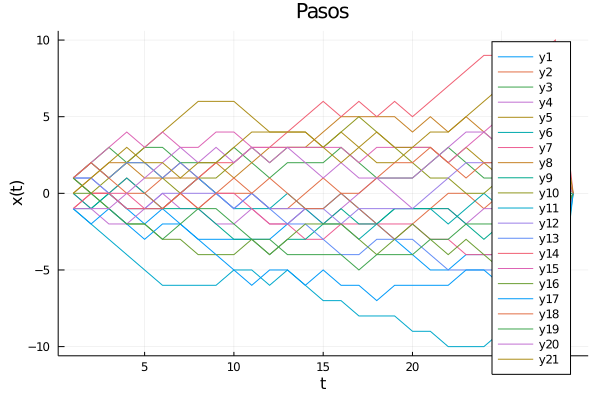

In [30]:
arreglos=zeros(20)
for i in 1:20
    arreglos[i]=(rand(1:1000))
end
plot(title="Pasos",xlabel="t",ylabel="x(t)")
for j in 50:70
    plot!(posicion[:,j])
end
plot!()